In [236]:
import pandas as pd
import numpy as np
from textblob import TextBlob as tb
from textblob import Word
from nltk.corpus import stopwords
import neattext.functions as nfx
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from PIL import Image
plt.style.use('ggplot')
import string
from string import digits

from nltk.stem.wordnet import WordNetLemmatizer

import warnings
warnings.simplefilter('ignore')

In [237]:
march=pd.read_csv('01_PREPROCESSED_MARCH.csv')
april=pd.read_csv('02_PREPROCESSED_APRIL.csv')
may=pd.read_csv('03_PREPROCESSED_MAY.csv')
june=pd.read_csv('04_PREPROCESSED_JUNE.csv')
july=pd.read_csv('05_PREPROCESSED_JULY.csv')
august=pd.read_csv('06_PREPROCESSED_AUGUST.csv')

In [238]:
def remove_words(list1, remove_words):
    for word in list(list1):
        if word in remove_words:
            list1.remove(word)
    return list1   
def remove_single_char(list):
    for token in list:
        if( len(token)==1):
            list.remove(token)
def Convert_list(string):
    li = list(string.split(" "))
    return li
def listToString(s): 
    str1 = "" 
    return (str1.join(s))

In [239]:
c_word=['[',']',"'",',',]

In [240]:
hastags_list_march=march['hastags']
hastags_list_april=april['hastags']
hastags_list_may=may['hastags']
hastags_list_june=june['hastags']
hastags_list_july=july['hastags']
hastags_list_august=august['hastags']

In [241]:
for i in range(0,march.shape[0]):
    ls=list(march['hastags'][i])
    ls=remove_words(ls,c_word)
    ls=listToString(ls)
    hastags_list_march[i]=ls

for i in range(0,april.shape[0]):
    ls=list(april['hastags'][i])
    ls=remove_words(ls,c_word)
    ls=listToString(ls)
    hastags_list_april[i]=ls

for i in range(0,may.shape[0]):
    ls=list(may['hastags'][i])
    ls=remove_words(ls,c_word)
    ls=listToString(ls)
    hastags_list_may[i]=ls

for i in range(0,june.shape[0]):
    ls=list(june['hastags'][i])
    ls=remove_words(ls,c_word)
    ls=listToString(ls)
    hastags_list_june[i]=ls

for i in range(0,july.shape[0]):
    ls=list(july['hastags'][i])
    ls=remove_words(ls,c_word)
    ls=listToString(ls)
    hastags_list_july[i]=ls

for i in range(0,august.shape[0]):
    ls=list(august['hastags'][i])
    ls=remove_words(ls,c_word)
    ls=listToString(ls)
    hastags_list_august[i]=ls

In [242]:
hastags_tokens_march= [token for line in hastags_list_march for token in line.split()]
hastags_tokens_april= [token for line in hastags_list_april for token in line.split()]
hastags_tokens_may= [token for line in hastags_list_may for token in line.split()]
hastags_tokens_june= [token for line in hastags_list_june for token in line.split()]
hastags_tokens_july= [token for line in hastags_list_july for token in line.split()]
hastags_tokens_august= [token for line in hastags_list_august for token in line.split()]

In [243]:
hastags_tokens_march

['#COVID19',
 '#CoronaVirusUpdates',
 '#geriatrics',
 '#COVID19Vaccination',
 '#donated',
 '#gustokongmaluha',
 '#CoWIN',
 '#WorldCup2030',
 '#WorldCup',
 '#',
 '#',
 '#corona',
 '#heath',
 '#bangalore',
 '#WorldTradePark',
 '#MyBMCUpdates',
 '#VaccineDrive!',
 '#WomensHistoryMonth',
 '#IWD2021',
 '#covid_19',
 '#studentcampaign',
 '#environment',
 '#raiseyourvoice',
 '#stayhome',
 '#staysafe',
 '#UPCM',
 '#coronavirus',
 '#Next50Talks',
 '#BahrainGP!',
 '#TheFirstEdition',
 '#ACMilan',
 '#Fortnite',
 '#VaccinePassports',
 '#twitchstream',
 '#Malaysian',
 '#DemiPemulihanRI',
 '#vaccine',
 '#COVID19Vaccine',
 '#COVID',
 '#EuropaLeague',
 '#ChampionsLeague',
 '#UEFAChampionsLeague',
 '#MFLTransfer2021',
 '#PremierLeague',
 '#PRELEMI',
 '#footballtime',
 '#EuropaLeague',
 '#ATMCHE',
 '#CHUANG2021',
 '#Covid_19',
 '#weddings.',
 '#Covishield',
 '#COVID19India',
 '#COVID19Vaccine',
 '#PSL6',
 '#pashawarzalmi',
 '#YellowStorm',
 '#TalhaZiaMTZ',
 '#HumanCentric',
 '#Design.',
 '#DesignThinkin

In [244]:
remove_single_char(hastags_tokens_march)
remove_single_char(hastags_tokens_april)
remove_single_char(hastags_tokens_may)
remove_single_char(hastags_tokens_june)
remove_single_char(hastags_tokens_july)
remove_single_char(hastags_tokens_august)

In [245]:
hastags_tokens_march


['#COVID19',
 '#CoronaVirusUpdates',
 '#geriatrics',
 '#COVID19Vaccination',
 '#donated',
 '#gustokongmaluha',
 '#CoWIN',
 '#WorldCup2030',
 '#WorldCup',
 '#corona',
 '#heath',
 '#bangalore',
 '#WorldTradePark',
 '#MyBMCUpdates',
 '#VaccineDrive!',
 '#WomensHistoryMonth',
 '#IWD2021',
 '#covid_19',
 '#studentcampaign',
 '#environment',
 '#raiseyourvoice',
 '#stayhome',
 '#staysafe',
 '#UPCM',
 '#coronavirus',
 '#Next50Talks',
 '#BahrainGP!',
 '#TheFirstEdition',
 '#ACMilan',
 '#Fortnite',
 '#VaccinePassports',
 '#twitchstream',
 '#Malaysian',
 '#DemiPemulihanRI',
 '#vaccine',
 '#COVID19Vaccine',
 '#COVID',
 '#EuropaLeague',
 '#ChampionsLeague',
 '#UEFAChampionsLeague',
 '#MFLTransfer2021',
 '#PremierLeague',
 '#PRELEMI',
 '#footballtime',
 '#EuropaLeague',
 '#ATMCHE',
 '#CHUANG2021',
 '#Covid_19',
 '#weddings.',
 '#Covishield',
 '#COVID19India',
 '#COVID19Vaccine',
 '#PSL6',
 '#pashawarzalmi',
 '#YellowStorm',
 '#TalhaZiaMTZ',
 '#HumanCentric',
 '#Design.',
 '#DesignThinking',
 '#JMUSG

In [246]:
def get_tweets_tokens(docx,num=100):
    word_tokens = Counter(docx)
    num=len(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [247]:
most_common_hastags_march = get_tweets_tokens(hastags_tokens_march)
hastags_df_march = pd.DataFrame(most_common_hastags_march.items(),columns=['hastag','scores'])

most_common_hastags_april = get_tweets_tokens(hastags_tokens_april)
hastags_df_april = pd.DataFrame(most_common_hastags_april.items(),columns=['hastag','scores'])

most_common_hastags_may = get_tweets_tokens(hastags_tokens_may)
hastags_df_may = pd.DataFrame(most_common_hastags_may.items(),columns=['hastag','scores'])

most_common_hastags_june = get_tweets_tokens(hastags_tokens_june)
hastags_df_june = pd.DataFrame(most_common_hastags_june.items(),columns=['hastag','scores'])

most_common_hastags_july = get_tweets_tokens(hastags_tokens_july)
hastags_df_july = pd.DataFrame(most_common_hastags_july.items(),columns=['hastag','scores'])

most_common_hastags_august = get_tweets_tokens(hastags_tokens_august)
hastags_df_august = pd.DataFrame(most_common_hastags_august.items(),columns=['hastag','scores'])

In [248]:
sns.set(font_scale = 1)

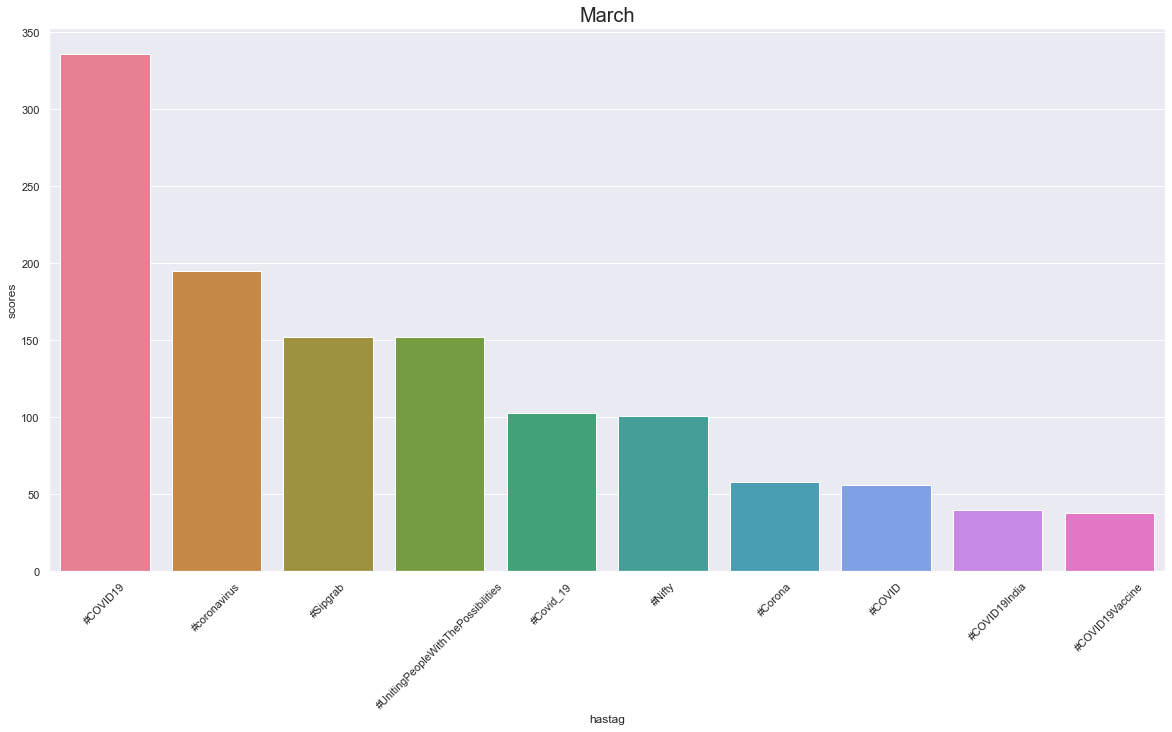

In [249]:
plt.figure(figsize=(20,10))
sns.barplot(x='hastag',y='scores',data=hastags_df_march[0:10],palette='husl')
plt.title("March",fontsize=20)
plt.xticks(rotation=45)
plt.show()

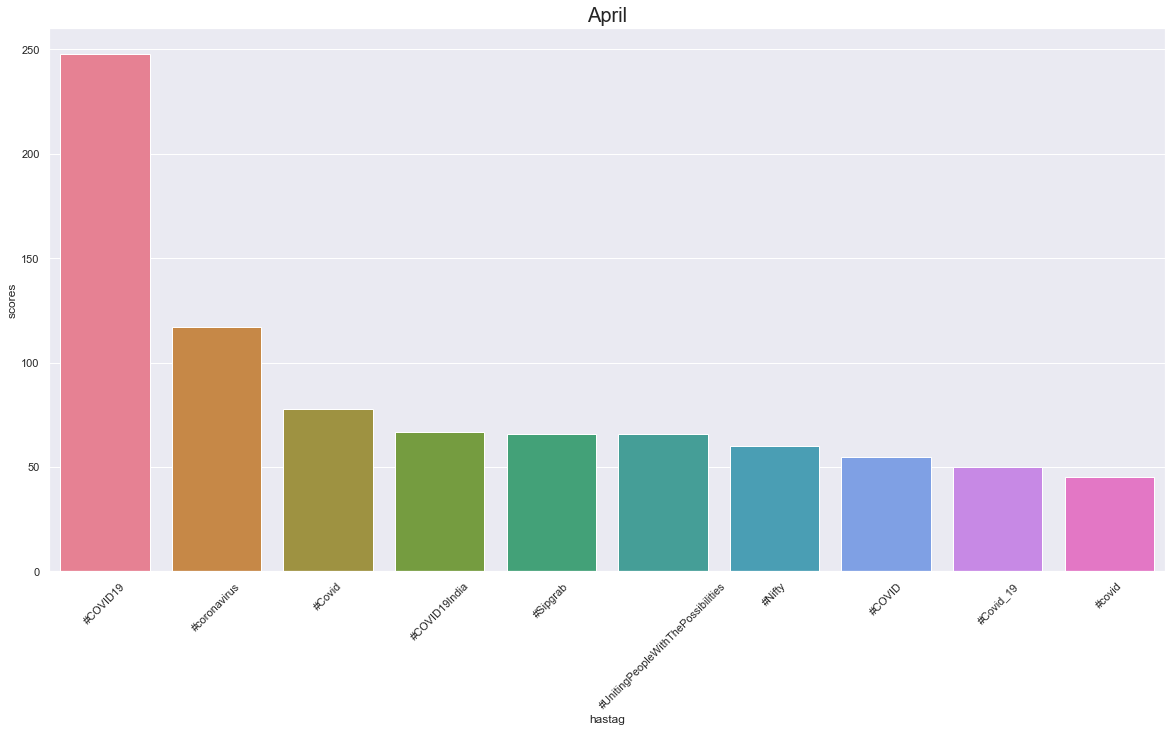

In [250]:
plt.figure(figsize=(20,10))
sns.barplot(x='hastag',y='scores',data=hastags_df_april[0:10],palette='husl')
plt.title("April",fontsize=20)
plt.xticks(rotation=45)
plt.show()

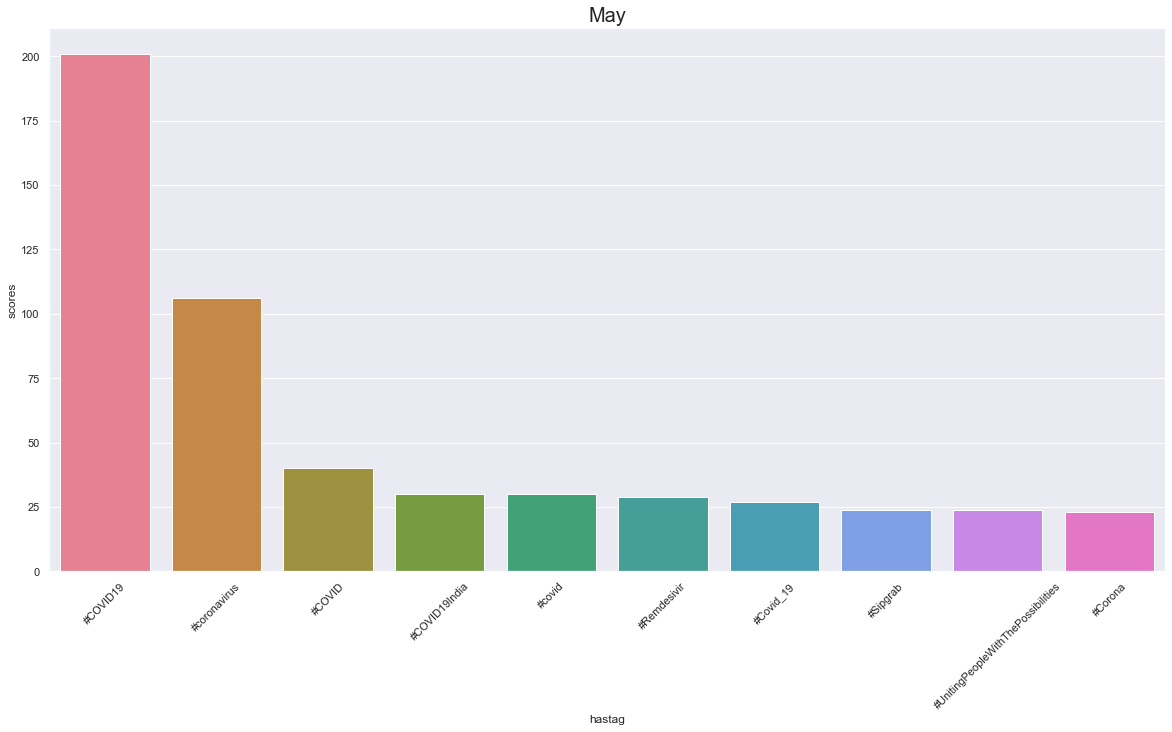

In [251]:
plt.figure(figsize=(20,10))
sns.barplot(x='hastag',y='scores',data=hastags_df_may[0:10],palette='husl')
plt.title("May",fontsize=20)
plt.xticks(rotation=45)
plt.show()

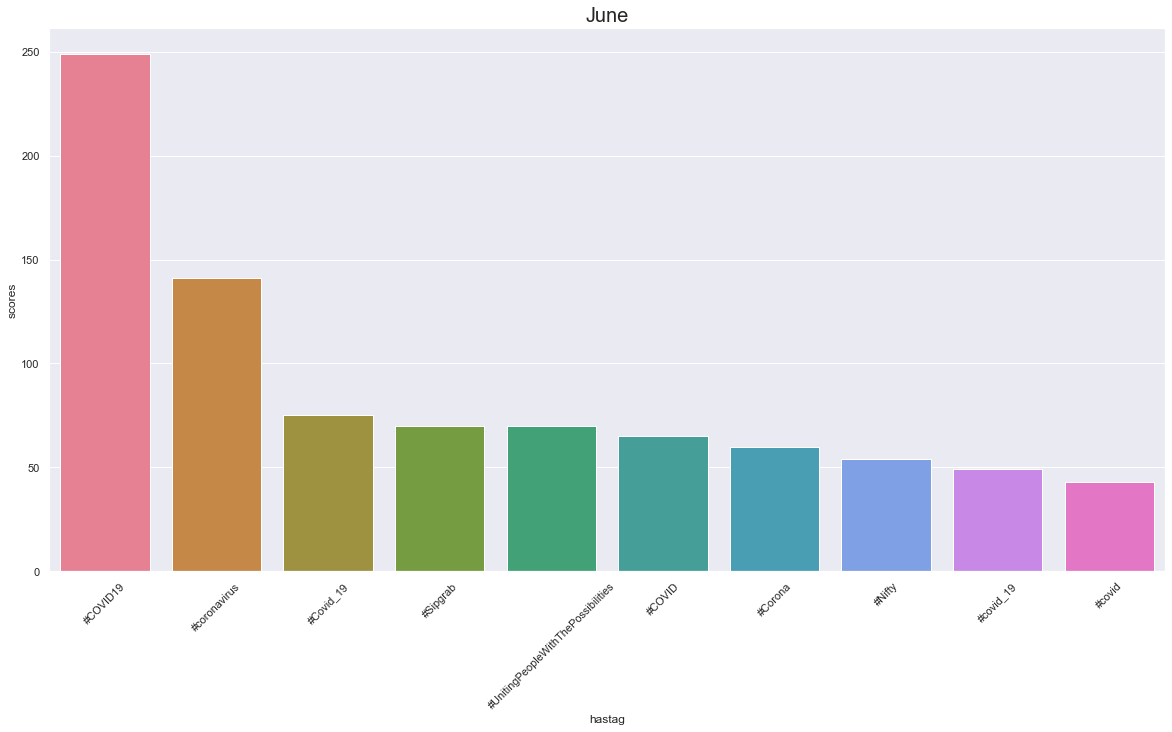

In [252]:
plt.figure(figsize=(20,10))
sns.barplot(x='hastag',y='scores',data=hastags_df_june[0:10],palette='husl')
plt.title("June",fontsize=20)
plt.xticks(rotation=45)
plt.show()

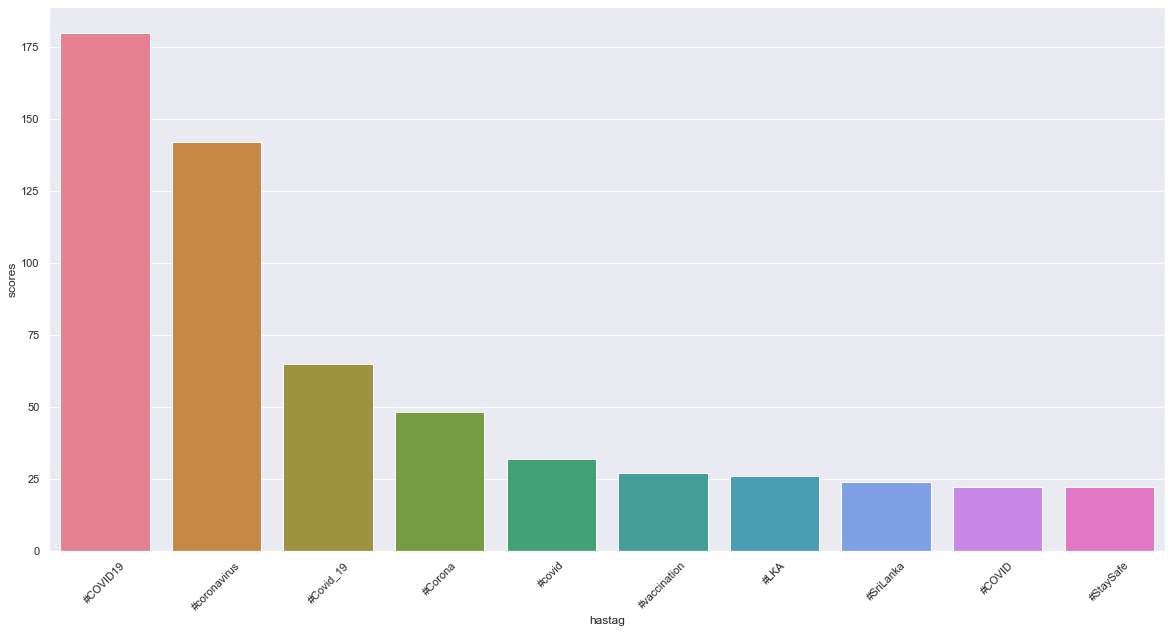

In [253]:
plt.figure(figsize=(20,10))
sns.barplot(x='hastag',y='scores',data=hastags_df_july[0:10],palette='husl')
plt.xticks(rotation=45)
plt.show()

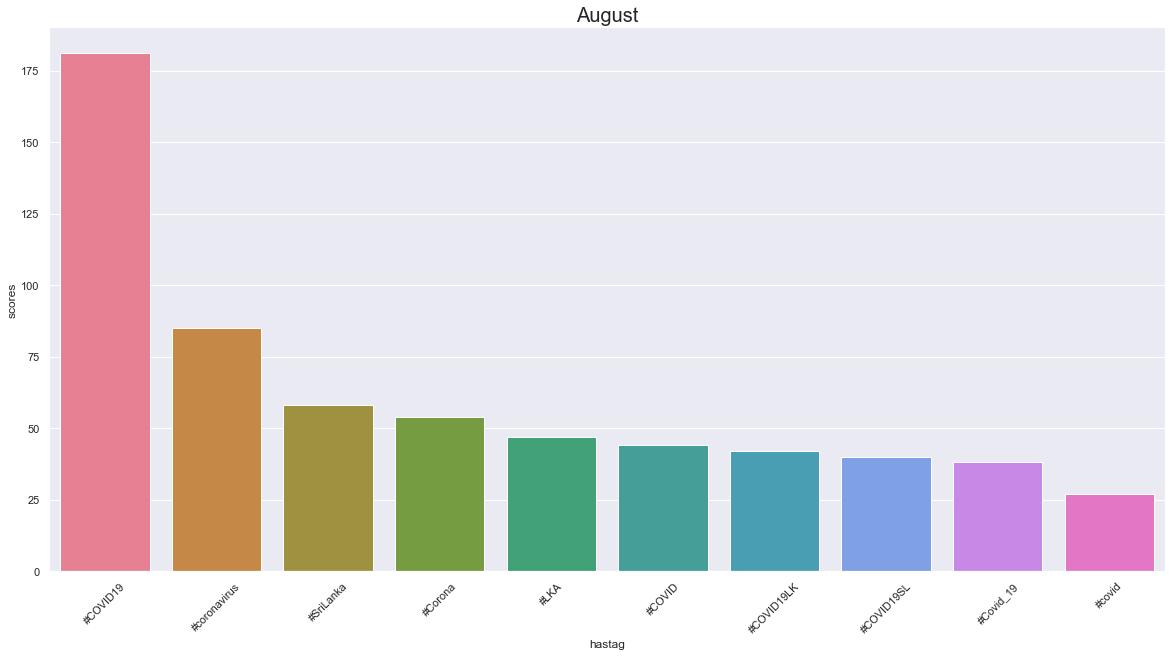

In [254]:
plt.figure(figsize=(20,10))
sns.barplot(x='hastag',y='scores',data=hastags_df_august[0:10],palette='husl')
plt.title("August",fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [255]:
hastags_df_may

,hastag,scores
0,#COVID19,201
1,#coronavirus,106
2,#COVID,40
3,#COVID19India,30
4,#covid,30
...,...,...
1445,#Urgent,1
1446,#PlasmaDonor,1
1447,#KolkataFightsCovid19,1
1448,#harshreality,1


In [256]:
x='#vaccine'
y='#covid'
z='#coronavirus'
a='#vaccination'
# '#GiveTheVaccinesModi'
# '#lockdown'
# '#OnlineExam'
# '#vaccine'
# '#postponeboards'
# '#Sipgrab'
#  '#StaySafe'

In [257]:
hastag_Freq_x=[0,0,0,0,0,0]
hastag_Freq_y=[0,0,0,0,0,0]
hastag_Freq_z=[0,0,0,0,0,0]
hastag_Freq_a=[0,0,0,0,0,0]
j=0
k=0
p=0
q=0

In [258]:
for i in range(0,hastags_df_march.shape[0]):
    if(x ==hastags_df_march['hastag'][i]):
        hastag_Freq_x[j]=hastags_df_march['scores'][i]
    if(y ==hastags_df_march['hastag'][i]):
        hastag_Freq_y[k]=hastags_df_march['scores'][i]      
    if(z ==hastags_df_march['hastag'][i]):
        hastag_Freq_z[p]=hastags_df_march['scores'][i]      
    if(a ==hastags_df_march['hastag'][i]):
        hastag_Freq_a[q]=hastags_df_march['scores'][i]      
j+=1
k+=1
p+=1
q+=1
for i in range(0,hastags_df_april.shape[0]):
    if(x ==hastags_df_april['hastag'][i]):
        hastag_Freq_x[j]=hastags_df_april['scores'][i]
    if(y ==hastags_df_april['hastag'][i]):
        hastag_Freq_y[k]=hastags_df_april['scores'][i]
    if(z ==hastags_df_april['hastag'][i]):
        hastag_Freq_z[p]=hastags_df_april['scores'][i]
    if(a ==hastags_df_april['hastag'][i]):
        hastag_Freq_a[q]=hastags_df_april['scores'][i]
j+=1
k+=1
p+=1
q+=1
for i in range(0,hastags_df_may.shape[0]):
    if(x ==hastags_df_may['hastag'][i]):
       hastag_Freq_x[j]=hastags_df_may['scores'][i]
    if(y ==hastags_df_may['hastag'][i]):
        hastag_Freq_y[k]=hastags_df_may['scores'][i]
    if(z ==hastags_df_may['hastag'][i]):
        hastag_Freq_z[p]=hastags_df_may['scores'][i]
    if(a ==hastags_df_may['hastag'][i]):
        hastag_Freq_a[q]=hastags_df_may['scores'][i]
j+=1
k+=1
p+=1
q+=1
for i in range(0,hastags_df_june.shape[0]):
    if(x ==hastags_df_june['hastag'][i]):
       hastag_Freq_x[j]=hastags_df_june['scores'][i]
    if(y ==hastags_df_june['hastag'][i]):
         hastag_Freq_y[k]=hastags_df_june['scores'][i]
    if(z ==hastags_df_june['hastag'][i]):
         hastag_Freq_y[p]=hastags_df_june['scores'][i]
    if(a ==hastags_df_june['hastag'][i]):
         hastag_Freq_a[q]=hastags_df_june['scores'][i]
j+=1
k+=1
p+=1
q+=1
for i in range(0,hastags_df_july.shape[0]):
    if(x ==hastags_df_july['hastag'][i]):
       hastag_Freq_x[j]=hastags_df_june['scores'][i]
    if(y ==hastags_df_july['hastag'][i]):
       hastag_Freq_y[k]=hastags_df_june['scores'][i]
    if(z ==hastags_df_july['hastag'][i]):
       hastag_Freq_z[p]=hastags_df_june['scores'][i]
    if(a ==hastags_df_july['hastag'][i]):
       hastag_Freq_a[q]=hastags_df_june['scores'][i]
j+=1
k+=1
p+=1
q+=1
for i in range(0,hastags_df_august.shape[0]):
    if(x ==hastags_df_april['hastag'][i]):
       hastag_Freq_x[j]=hastags_df_april['scores'][i]
    if(y ==hastags_df_april['hastag'][i]):
        hastag_Freq_y[k]=hastags_df_april['scores'][i]
    if(z ==hastags_df_april['hastag'][i]):
        hastag_Freq_z[p]=hastags_df_april['scores'][i]
    if(a ==hastags_df_april['hastag'][i]):
        hastag_Freq_a[q]=hastags_df_april['scores'][i]

In [259]:
hastag_Freq_x

[18, 23, 17, 27, 6, 23]

In [260]:
hastag_Freq_y

[23, 45, 30, 43, 70, 45]

In [261]:
hastag_Freq_z

[195, 117, 106, 0, 141, 117]

In [262]:
hastag_Freq_a

[11, 9, 5, 17, 65, 9]

In [263]:
month=['March','April','May','June','july','August']

In [264]:
data_x={'freq':hastag_Freq_x,'month':month}
data_x

{'freq': [18, 23, 17, 27, 6, 23],
 'month': ['March', 'April', 'May', 'June', 'july', 'August']}

In [265]:
data_y={'freq':hastag_Freq_y,'month':month}
data_y

{'freq': [23, 45, 30, 43, 70, 45],
 'month': ['March', 'April', 'May', 'June', 'july', 'August']}

In [266]:
data_z={'freq':hastag_Freq_z,'month':month}
data_z

{'freq': [195, 117, 106, 0, 141, 117],
 'month': ['March', 'April', 'May', 'June', 'july', 'August']}

In [267]:
data_a={'freq':hastag_Freq_a,'month':month}
data_a

{'freq': [11, 9, 5, 17, 65, 9],
 'month': ['March', 'April', 'May', 'June', 'july', 'August']}

In [268]:
Hastag_x=pd.DataFrame(data_x)
Hastag_x

,freq,month
0,18,March
1,23,April
2,17,May
3,27,June
4,6,july
5,23,August


In [269]:
Hastag_y=pd.DataFrame(data_y)
Hastag_y

,freq,month
0,23,March
1,45,April
2,30,May
3,43,June
4,70,july
5,45,August


In [270]:
Hastag_z=pd.DataFrame(data_z)
Hastag_z

,freq,month
0,195,March
1,117,April
2,106,May
3,0,June
4,141,july
5,117,August


In [271]:
Hastag_a=pd.DataFrame(data_a)
Hastag_a

,freq,month
0,11,March
1,9,April
2,5,May
3,17,June
4,65,july
5,9,August


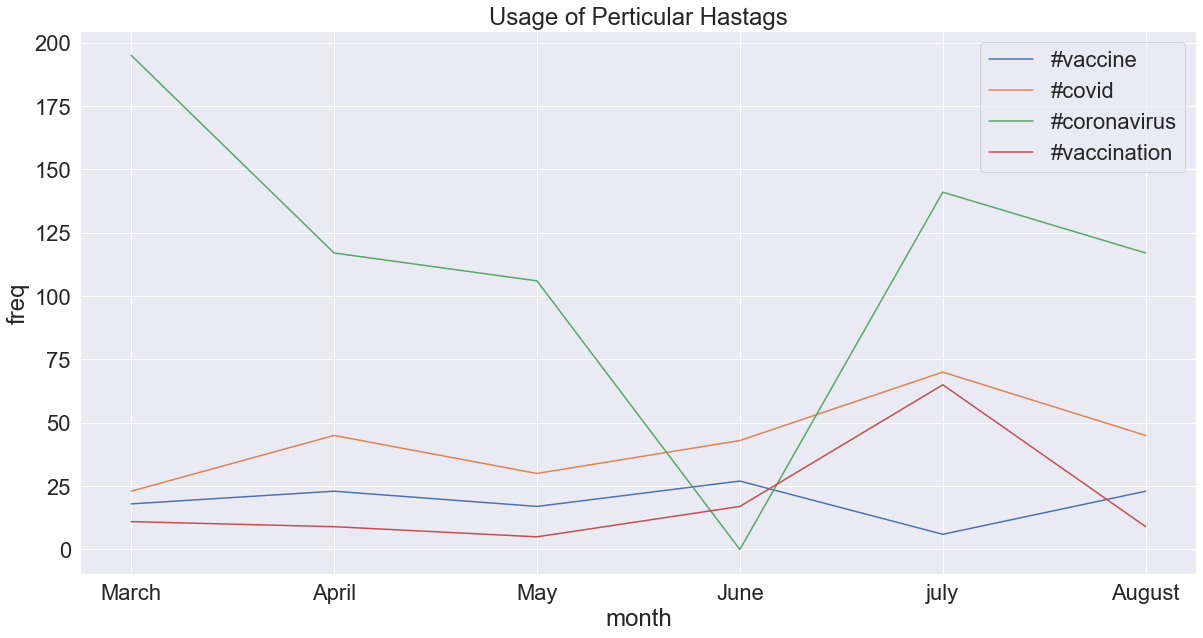

In [272]:
plt.figure(figsize=(20,10))
sns.set(font_scale = 2)
sns.lineplot( data=Hastag_x,x="month", y="freq").set(title="Usage of Perticular Hastags",)
sns.lineplot( data=Hastag_y,x="month", y="freq")
sns.lineplot( data=Hastag_z,x="month", y="freq")
sns.lineplot( data=Hastag_a,x="month", y="freq")
plt.legend([x,y,z,a])
plt.show()